<a href="https://colab.research.google.com/github/live7086/AHK/blob/main/0515_%E4%B8%8A%E8%AA%B2%E5%85%A7%E5%AE%B9_%E6%96%87%E5%AD%97%E9%9B%B2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive') #安裝google drive在這個notebook裡面

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
ls '/content/drive/MyDrive/colab' #確認資料夾是否存在

 beeMovie.txt   news.txt   'testingdrive (1).gdoc'   testingdrive.txt
 lyrics.txt     test.gdoc   testingdrive.gdoc


In [ ]:
import nltk
nltk.download("popular")
nltk.download('all-corpora')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

True

In [ ]:
import nltk

from nltk.corpus import PlaintextCorpusReader

corpus_root = '/content/drive/My Drive/Colab Notebooks/TED' # 請改成自己的路徑
wordlists = PlaintextCorpusReader(corpus_root, '.*') # *: all .txt

books = wordlists.fileids()
print(books)

In [ ]:
from nltk.corpus import brown
# 使用 ConditionalFreqDist() 在多個文本中計算特定字詞個數


cfd = nltk.ConditionalFreqDist((fileid, word)
    for fileid in books
    for word in wordlists.words(fileid)
    )

findList = ['happy', 'positive', 'negative']
cfd.tabulate(conditions=books, samples=findList)

In [ ]:
#分析高頻率單字

import nltk
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.probability import FreqDist
from nltk.corpus import stopwords
import string

dataset = wordlists.raw('2011pos Older people are happier.txt') # your txt file
text_list = dataset.split()

stop = stopwords.words('english')
wnl = WordNetLemmatizer()

# 去掉停用
clean_tokens = text_list[:]
for token in text_list:
  if token.lower() in stopwords.words('english'):
    clean_tokens.remove(token)


# 去掉標點
no_string_tokens = clean_tokens
for token in clean_tokens:
  if token in string.punctuation or token in '--' or token in '?': # ? !..
    no_string_tokens.remove(token)

# 轉成小寫, 去掉空格
lower_tokens = []
for token in no_string_tokens:
  new_token = token.replace(' ', '');
  lower_tokens.append(new_token.lower())

# 詞性還原
lemmatizer_tokens = []
for token in lower_tokens:
 lemmatizer_tokens.append(wnl.lemmatize(token))


fdist = FreqDist(lemmatizer_tokens)
#出現頻率最高的10個單字
fdist1 = fdist.most_common(10)
print(fdist1)

In [ ]:
import matplotlib.pyplot as plt

x = [data[0] for data in fdist1] # ['people', 'older', 'life' ...]
y = [data[1] for data in fdist1] # ['29', '19', '12' ...]

plt.bar(x, y)     #繪製長條圖
plt.title('Key words')          #設定圖形標題
plt.xlabel('Words')                #設定X軸標籤
plt.ylabel('Nums')                   #設定Y軸標籤
plt.xticks(fontsize=10, rotation=90)
plt.show()

In [ ]:
import matplotlib.pyplot as plt

x = ['happy', 'positive', 'trouble', 'refactor']
y = [20, 15, 26, 10]


plt.bar(x, y)     #繪製長條圖
plt.title('Key words')          #設定圖形標題
plt.xlabel('Words')                #設定X軸標籤
plt.ylabel('Nums')                   #設定Y軸標籤
plt.figure(figsize=(5,4))
plt.show()

In [ ]:
findList = ['happy', 'positive', 'negative' ]

for fileid in books:
   myWords = wordlists.words(fileid)
   myText = nltk.text.Text(myWords)
   print(fileid)
   myText.dispersion_plot(findList)

In [ ]:
print(wordlists.fileids())

In [ ]:
cfd = nltk.ConditionalFreqDist(
           (target, fileid[:7]) # 表格下方顯示txt檔名前七個字
           for fileid in wordlists.fileids()
           for w in wordlists.words(fileid)
           #List裡面請改成你要搜尋的字詞
           for target in ['happy', 'positive', 'negative', 'happier']
           if w.lower().startswith(target))
cfd.plot()

# 文字雲

### wordcloud 資料視覺化

[World Could Doc](https://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html)


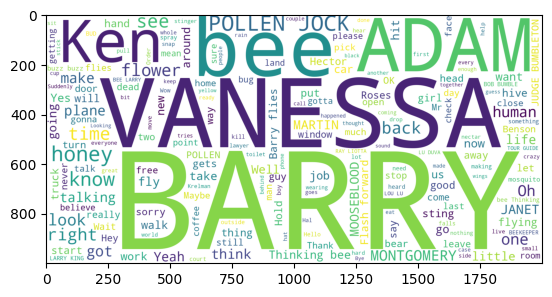

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# doc: https://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html

#讀取文本
file_text = open('/content/drive/MyDrive/colab/beeMovie.txt','r').read()


# background_color 背景顏色
# width 寬
# height 高
# margin 圖片邊緣
# max_font_size 設定文字中最大的大小是多少
# min_font_size
# max_words  文字雲顯示最大詞數
# font_path="/tmp/DFFT_C7.ttc", #設置字體

wordcloud = WordCloud(
    background_color="white",
    width=2000,
    height=1000,
    margin= 10,
).generate(file_text)


plt.imshow(wordcloud)
plt.axis("on")
plt.show()


## 濾掉常用字詞或特定字詞

In [ ]:
from wordcloud import STOPWORDS
print(STOPWORDS)

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

#讀取文本
f = open('/content/drive/MyDrive/Colab Notebooks/TED/2011pos Older people are happier.txt','r').read() # 請改成自己的路徑

# stopwords 停用字詞
stop = ["people", "old people", "time", "life"] + list(STOPWORDS)

wordcloud = WordCloud(
    background_color="white",
    width=1500,
    height=1000,
    margin=2,
    stopwords=stop
).generate(f)


plt.imshow(wordcloud)
plt.axis("off")
plt.show()



In [ ]:
import nltk

from nltk.corpus import PlaintextCorpusReader

corpus_root = '/content/drive/My Drive/Colab Notebooks/TED' # 請改成自己的路徑
wordlists = PlaintextCorpusReader(corpus_root, '.*')

books = wordlists.fileids()
print(books)

## 一次顯示多張文字雲圖

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt


stop = list(STOPWORDS)

for fileid in books:
  f = open('/content/drive/My Drive/Colab Notebooks/TED/'+fileid,'r').read()
  wordcloud = WordCloud(
      background_color="white",
      width=1500,
      height=1200,
      margin=2,
      stopwords=stop
  ).generate(f)

  plt.imshow(wordcloud)
  plt.axis("off")
  print(fileid)
  plt.show()

